In [1]:
from base_data_handler import BaseDataHandler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
handler = BaseDataHandler(path='Melbourne_housing.csv')
handler.try_clean_column_names()
handler.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   suburb          34857 non-null  object 
 1   address         34857 non-null  object 
 2   rooms           34857 non-null  int64  
 3   type            34857 non-null  object 
 4   method          34857 non-null  object 
 5   seller_g        34857 non-null  object 
 6   date            34857 non-null  object 
 7   distance        34856 non-null  float64
 8   postcode        34856 non-null  float64
 9   bedroom         26640 non-null  float64
 10  bathroom        26631 non-null  float64
 11  car             26129 non-null  float64
 12  landsize        23047 non-null  float64
 13  building_area   13760 non-null  object 
 14  year_built      15551 non-null  float64
 15  council_area    34854 non-null  object 
 16  latitude        26881 non-null  float64
 17  longtitude      26881 non-null 

c:\Users\lucas\Desktop\Machine Learning\2025-12-03\base_data_handler.py:108: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self.__df = pd.read_csv(self.file_path, encoding=self.encoding)


In [3]:
handler.df = handler.df.drop(["building_area","landsize"], axis=1)
handler.df.dropna(subset=["price"], inplace=True)
handler.df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 27247 entries, 1 to 34856
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   suburb          27247 non-null  object 
 1   address         27247 non-null  object 
 2   rooms           27247 non-null  int64  
 3   type            27247 non-null  object 
 4   method          27247 non-null  object 
 5   seller_g        27247 non-null  object 
 6   date            27247 non-null  object 
 7   distance        27246 non-null  float64
 8   postcode        27246 non-null  float64
 9   bedroom         20806 non-null  float64
 10  bathroom        20800 non-null  float64
 11  car             20423 non-null  float64
 12  year_built      12084 non-null  float64
 13  council_area    27244 non-null  object 
 14  latitude        20993 non-null  float64
 15  longtitude      20993 non-null  float64
 16  region_name     27247 non-null  object 
 17  property_count  27244 non-null  floa

In [4]:
handler.df.nunique()

suburb              345
address           26751
rooms                12
type                  3
method                5
seller_g            349
date                 78
distance            213
postcode            209
bedroom              14
bathroom             10
car                  13
year_built          151
council_area         33
latitude          11366
longtitude        12275
region_name           8
property_count      336
parking_area          8
price              2871
dtype: int64

In [5]:
handler.df.describe()

,rooms,distance,postcode,bedroom,bathroom,car,year_built,latitude,longtitude,property_count,price
count,27247.000000,27246.000000,27246.000000,20806.000000,20800.000000,20423.000000,12084.000000,20993.000000,20993.000000,27244.000000,2.724700e+04
mean,2.992293,11.280276,3113.796080,3.046237,1.591683,1.715370,1966.609153,-37.806963,144.996711,7566.781089,1.050173e+06
std,0.954795,6.787469,111.139676,0.955122,0.700880,0.994216,36.762373,0.091619,0.120680,4492.382418,6.414671e+05
min,1.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,83.000000,8.500000e+04
25%,2.000000,6.400000,3046.000000,2.000000,1.000000,1.000000,1950.000000,-37.860900,144.925300,4294.000000,6.350000e+05
50%,3.000000,10.500000,3088.000000,3.000000,1.000000,2.000000,1970.000000,-37.800460,145.003200,6567.000000,8.700000e+05
75%,4.000000,14.000000,3153.000000,4.000000,2.000000,2.000000,2000.000000,-37.748970,145.068770,10412.000000,1.295000e+06
max,16.000000,48.100000,3978.000000,20.000000,9.000000,18.000000,2019.000000,-37.397800,145.526350,21650.000000,1.120000e+07


In [6]:
# Split addresses into lists of tokens
handler.df['address_split'] = handler.df['address'].str.split()

def keep_center(tokens):
    if not tokens:
        return None
    mid = len(tokens) // 2
    if len(tokens) % 2 == 0:
        return " ".join(tokens[mid-1:mid+1])  # two middle words
    else:
        return tokens[mid]

handler.df['address'] = handler.df['address_split'].apply(keep_center)
handler.df.drop("address_split", axis=1, inplace=True)
handler.df.nunique()

suburb              345
address            6808
rooms                12
type                  3
method                5
seller_g            349
date                 78
distance            213
postcode            209
bedroom              14
bathroom             10
car                  13
year_built          151
council_area         33
latitude          11366
longtitude        12275
region_name           8
property_count      336
parking_area          8
price              2871
dtype: int64

In [7]:
from math import radians, sin, cos, sqrt, atan2

_LAT_VIC = np.array([-38.1, -38.3, -38.5, -39.0])
_LON_VIC = np.array([144.3, 145.0, 145.3, 146.3])

_COAST_COEFFS_VIC = np.polyfit(_LAT_VIC, _LON_VIC, deg=2)

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2)**2
    return 2 * R * atan2(sqrt(a), sqrt(1-a))

def _coast_lon_vic(lat):
    a, b, c = _COAST_COEFFS_VIC
    return a*lat*lat + b*lat + c

def coast_distance_vic(lat, lon):
    coast_lon = _coast_lon_vic(lat)
    return haversine(lat, lon, lat, coast_lon)


In [8]:
handler.try_rename_col(col='longtitude', name='longitude')
handler.try_rename_col(col='distance', name='cbd_distance')
_ = handler.try_add_col(target_col="dist_to_coast", func=lambda row: coast_distance_vic(row['latitude'],row['longitude']))
handler.df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27247 entries, 1 to 34856
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   suburb          27247 non-null  object 
 1   address         27247 non-null  object 
 2   rooms           27247 non-null  int64  
 3   type            27247 non-null  object 
 4   method          27247 non-null  object 
 5   seller_g        27247 non-null  object 
 6   date            27247 non-null  object 
 7   cbd_distance    27246 non-null  float64
 8   postcode        27246 non-null  float64
 9   bedroom         20806 non-null  float64
 10  bathroom        20800 non-null  float64
 11  car             20423 non-null  float64
 12  year_built      12084 non-null  float64
 13  council_area    27244 non-null  object 
 14  latitude        20993 non-null  float64
 15  longitude       20993 non-null  float64
 16  region_name     27247 non-null  object 
 17  property_count  27244 non-null  floa

In [9]:
handler.df['bathroom'] = handler.df['bathroom'].fillna(1)
handler.df[['car', 'bedroom']] = handler.df[['car', 'bedroom']].fillna(0)
handler.df.drop('year_built', inplace=True, axis=1)
handler.df.dropna(inplace=True)
handler.df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20993 entries, 1 to 34856
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   suburb          20993 non-null  object 
 1   address         20993 non-null  object 
 2   rooms           20993 non-null  int64  
 3   type            20993 non-null  object 
 4   method          20993 non-null  object 
 5   seller_g        20993 non-null  object 
 6   date            20993 non-null  object 
 7   cbd_distance    20993 non-null  float64
 8   postcode        20993 non-null  float64
 9   bedroom         20993 non-null  float64
 10  bathroom        20993 non-null  float64
 11  car             20993 non-null  float64
 12  council_area    20993 non-null  object 
 13  latitude        20993 non-null  float64
 14  longitude       20993 non-null  float64
 15  region_name     20993 non-null  object 
 16  property_count  20993 non-null  float64
 17  parking_area    20993 non-null  obje

In [10]:
# Frequency encode high-cardinality
for col in ["suburb", "seller_g", "council_area"]:
    freq = handler.df[col].value_counts()
    handler.df[col + "_freq"] = handler.df[col].map(freq)

# One-hot encode low-cardinality
handler.df = pd.get_dummies(handler.df, columns=["type", "method", "region_name", "parking_area"], drop_first=True)

# Drop address if not needed
handler.df = handler.df.drop(columns=["date", "seller_g", "council_area", "suburb", "address"])
handler.df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20993 entries, 1 to 34856
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   rooms                                   20993 non-null  int64  
 1   cbd_distance                            20993 non-null  float64
 2   postcode                                20993 non-null  float64
 3   bedroom                                 20993 non-null  float64
 4   bathroom                                20993 non-null  float64
 5   car                                     20993 non-null  float64
 6   latitude                                20993 non-null  float64
 7   longitude                               20993 non-null  float64
 8   property_count                          20993 non-null  float64
 9   price                                   20993 non-null  float64
 10  dist_to_coast                           20993 non-null  float64

In [11]:
handler.try_clean_column_names()

(True, None)

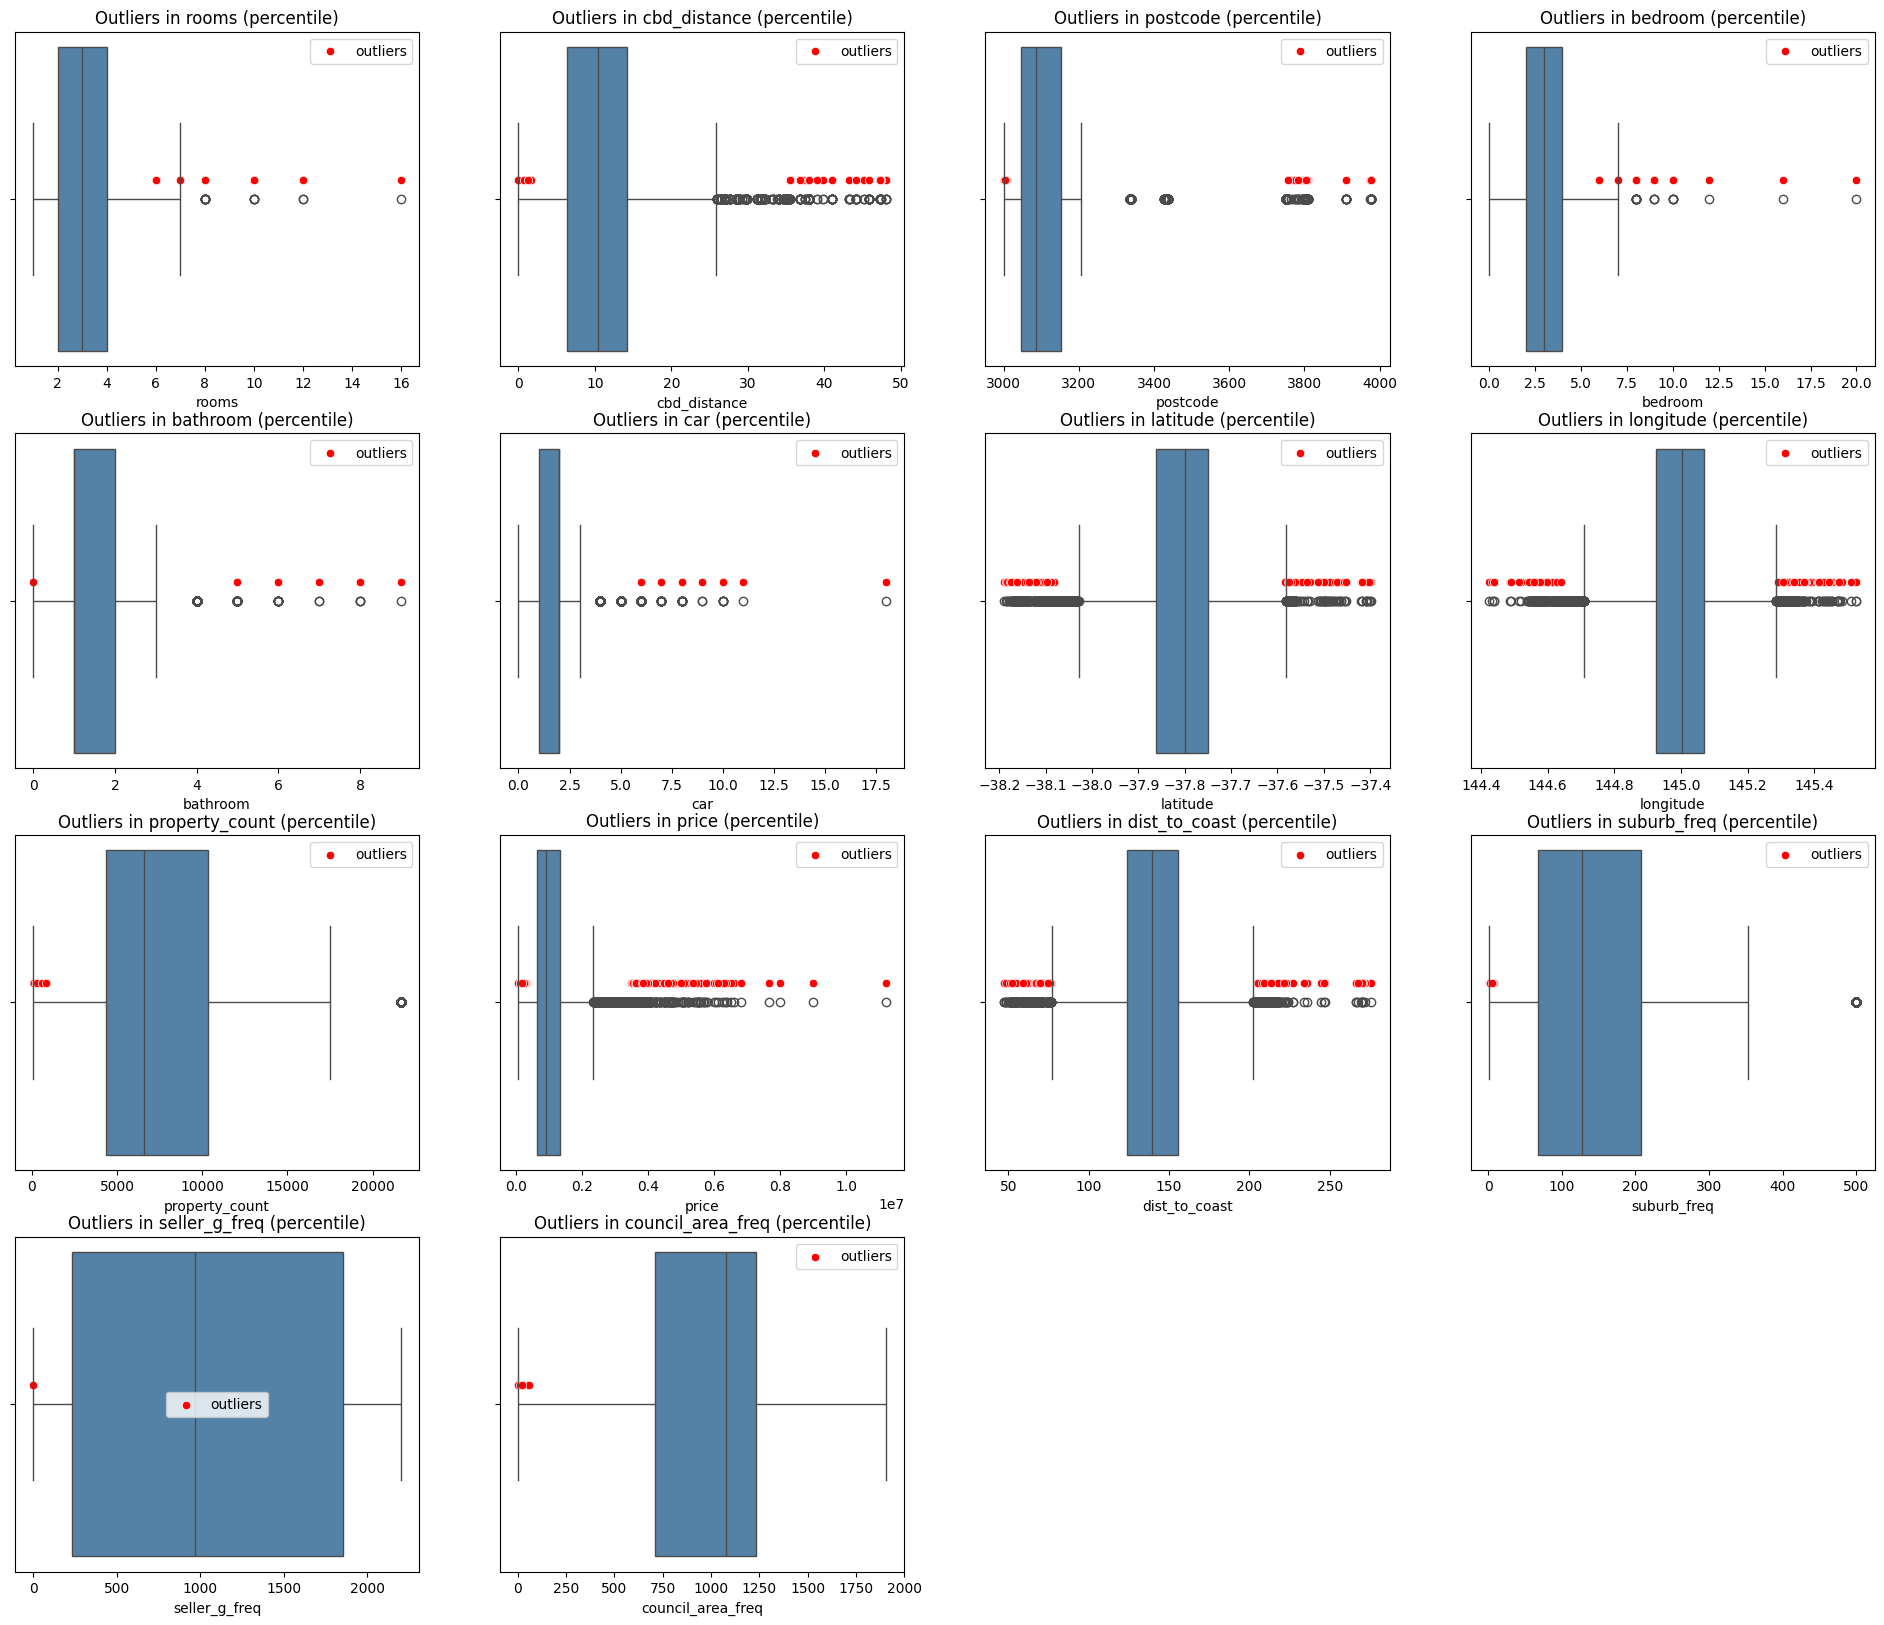

In [12]:
fig, axes = handler.get_outlier_case_study(cols=4)

In [13]:
mask = handler.get_outliers_df()        # DataFrame of flags
row_mask = mask.any(axis=1)             # collapse to single Series
handler.df = handler.df[~row_mask]      # keep only non-outliers
handler.df.dropna(inplace=True)

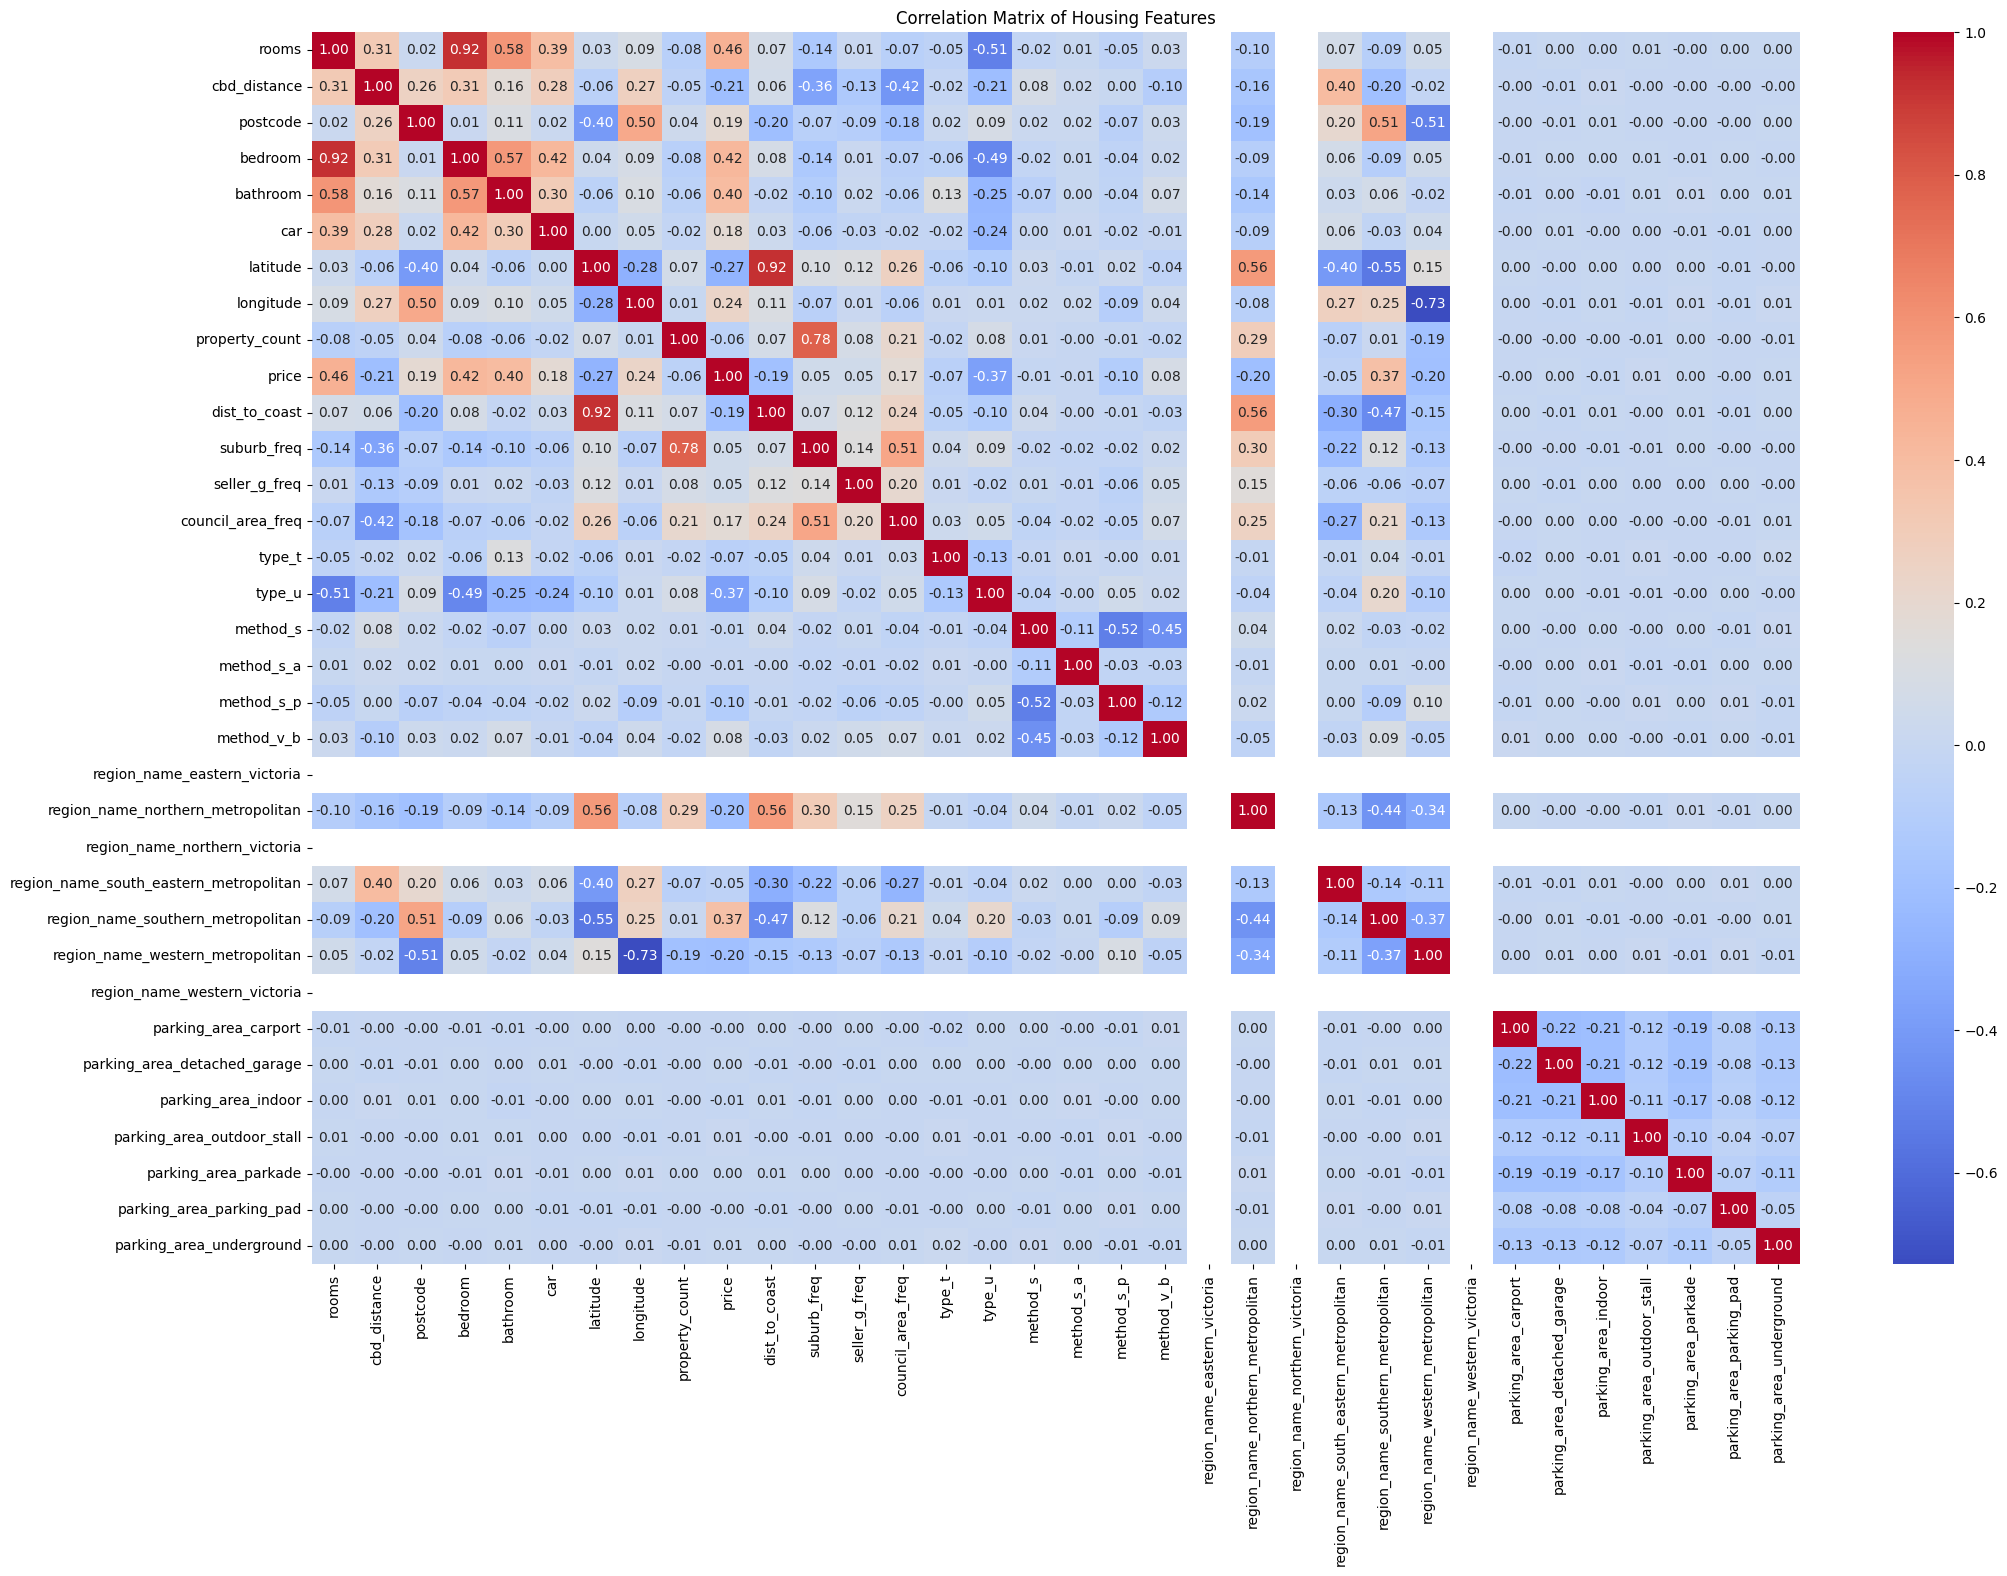

In [14]:
corr_matrix = handler.df.corr()

plt.figure(figsize=(24,16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Housing Features")
plt.show()

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

dropped_features = ["price"]

# Define features and target
X = handler.df.drop(dropped_features, axis=1)
y = np.log1p(handler.df["price"])

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Linear Regression pipeline ---
linear_model = make_pipeline(
    PolynomialFeatures(),
    StandardScaler(),
    LinearRegression()
)
linear_model.fit(X_train, y_train)
linear_y_pred_test = linear_model.predict(X_test)

# --- RidgeCV pipeline ---
ridge_model = make_pipeline(
    PolynomialFeatures(),
    StandardScaler(),
    RidgeCV(alphas=[0.2, 1.0])
)
ridge_model.fit(X_train, y_train)
ridge_y_pred_test = ridge_model.predict(X_test)

# --- LassoCV pipeline ---
lasso_model = make_pipeline(
    PolynomialFeatures(),
    StandardScaler(),
    LassoCV(alphas=np.logspace(-2, 1, 10), max_iter=10000, cv=5, n_jobs=-1)
)
lasso_model.fit(X_train, y_train)
lasso_y_pred_test = lasso_model.predict(X_test)

# --- Metrics ---
def evaluate(name, y_true, y_pred):
    y_true = np.expm1(y_true)
    y_pred = np.expm1(y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{name} Test R²: {r2:.4f}")
    print(f"{name} Test RMSE: {rmse:.2f}\n")

evaluate("Linear", y_test, linear_y_pred_test)
evaluate("RidgeCV", y_test, ridge_y_pred_test)
evaluate("LassoCV", y_test, lasso_y_pred_test)

# --- Best alphas chosen ---
print("Best Ridge alpha:", ridge_model.named_steps['ridgecv'].alpha_)
print("Best Lasso alpha:", lasso_model.named_steps['lassocv'].alpha_)

Linear Test R²: 0.7409
Linear Test RMSE: 279761.25

RidgeCV Test R²: 0.7122
RidgeCV Test RMSE: 294859.58

LassoCV Test R²: 0.6638
LassoCV Test RMSE: 318709.98

Best Ridge alpha: 0.2
Best Lasso alpha: 0.01


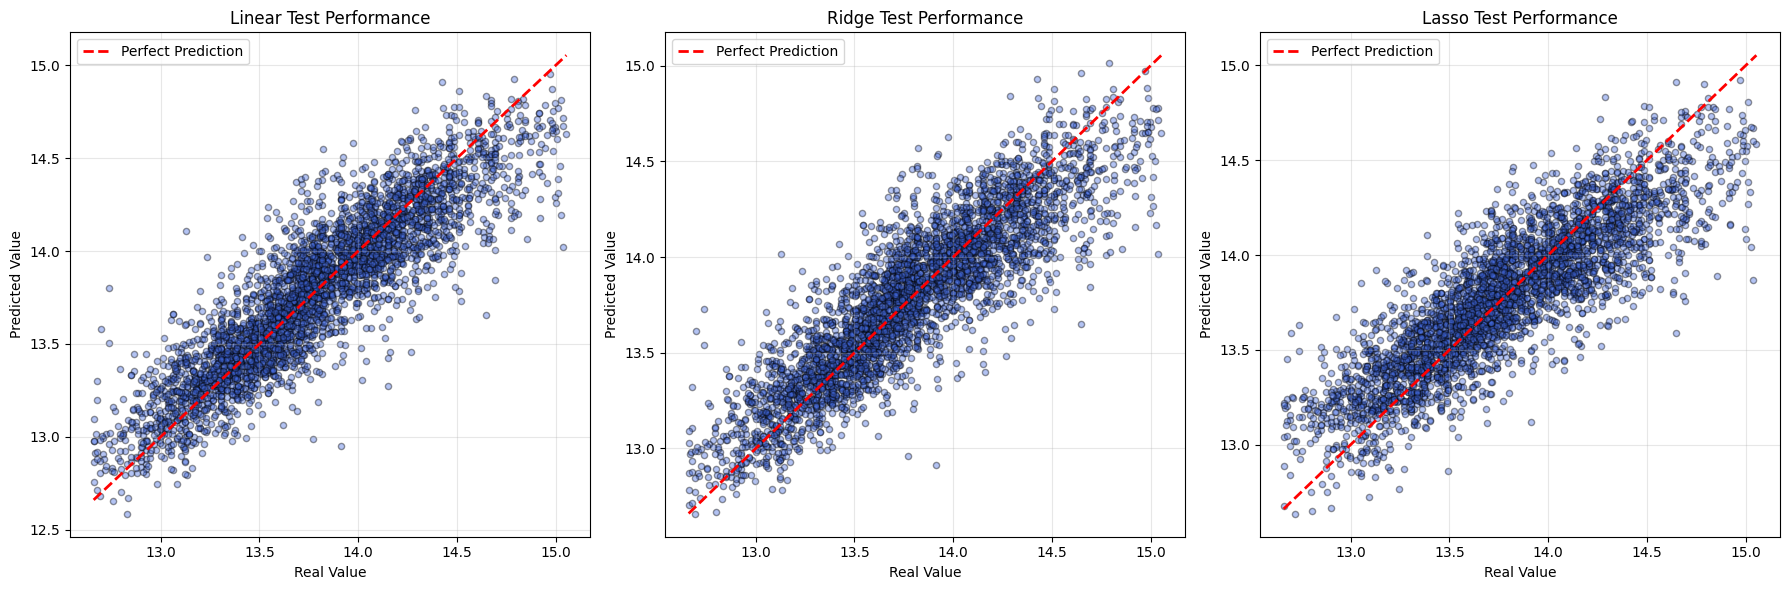

In [16]:
import matplotlib.pyplot as plt

# Collect models and predictions
models = {
    "Linear": (linear_model, linear_y_pred_test),
    "Ridge": (ridge_model, ridge_y_pred_test),
    "Lasso": (lasso_model, lasso_y_pred_test),
}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (name, (model, y_pred)) in zip(axes, models.items()):
    ax.scatter(y_test, y_pred, alpha=0.4, color='royalblue', edgecolor='k', s=20)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
            'r--', lw=2, label='Perfect Prediction')
    ax.set_xlabel('Real Value')
    ax.set_ylabel('Predicted Value')
    ax.set_title(f"{name} Test Performance")
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [17]:
handler.df.describe()

,rooms,cbd_distance,postcode,bedroom,bathroom,car,latitude,longitude,property_count,price,dist_to_coast,suburb_freq,seller_g_freq,council_area_freq
count,18619.000000,18619.000000,18619.000000,18619.000000,18619.000000,18619.000000,18619.000000,18619.000000,18619.000000,1.861900e+04,18619.000000,18619.000000,18619.000000,18619.000000
mean,3.023417,10.526940,3101.987110,2.980611,1.554273,1.618884,-37.806326,144.996971,7535.508567,1.083421e+06,139.696202,154.087223,1000.743380,1082.749987
std,0.875595,5.235757,76.375497,0.919817,0.646096,0.910945,0.079949,0.106898,4326.760295,5.515397e+05,23.229490,103.288787,792.574449,455.904337
min,1.000000,1.800000,3011.000000,0.000000,1.000000,0.000000,-38.069230,144.641430,852.000000,3.150000e+05,76.727315,9.000000,3.000000,121.000000
25%,2.000000,6.400000,3046.000000,2.000000,1.000000,1.000000,-37.859640,144.927215,4407.000000,6.845000e+05,124.273126,73.000000,265.000000,710.000000
50%,3.000000,10.200000,3084.000000,3.000000,1.000000,2.000000,-37.798800,145.003500,6567.000000,9.350000e+05,139.990211,133.000000,968.000000,1080.000000
75%,4.000000,13.800000,3148.000000,4.000000,2.000000,2.000000,-37.750260,145.065400,10412.000000,1.350000e+06,155.089780,216.000000,1856.000000,1346.000000
max,5.000000,31.700000,3752.000000,5.000000,4.000000,5.000000,-37.583640,145.289900,21650.000000,3.500000e+06,204.758190,500.000000,2201.000000,1906.000000


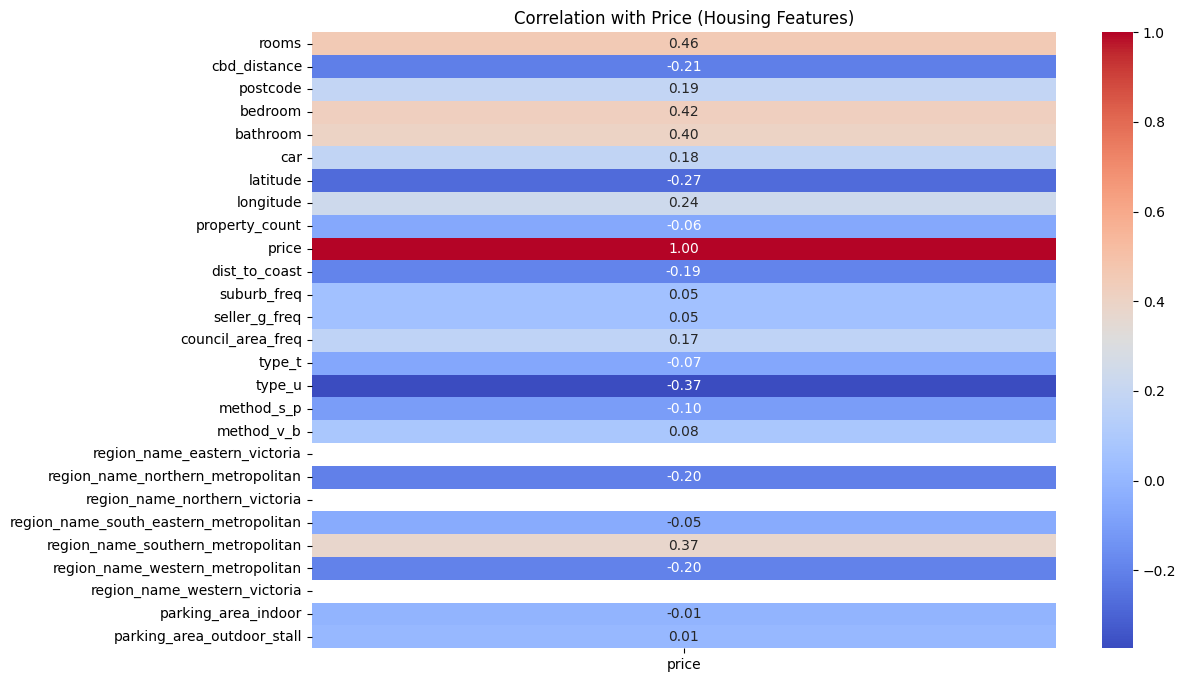

In [18]:

# Compute correlations with price
corrs = handler.df.corr(numeric_only=True)["price"]

# Set threshold for negligible correlation
threshold = 0.01

# Identify columns with correlation below threshold
low_corr_cols = corrs[abs(corrs) < threshold].index.tolist()

# Drop those columns
handler.df = handler.df.drop(columns=low_corr_cols)

# Recompute correlations after dropping
corrs = handler.df.corr(numeric_only=True)["price"]

# Plot heatmap of correlations with price
plt.figure(figsize=(12, 8))
sns.heatmap(corrs.to_frame(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation with Price (Housing Features)")
plt.show()
